In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df2 = pd.read_csv('diabetes.csv', usecols=['Pregnancies'])

In [3]:
df1 = pd.read_csv('diabetes.csv', na_values=0)

In [4]:
df2.shape

(768, 1)

In [5]:
df1 = df1.drop(['Pregnancies'], axis = 1)

In [6]:
df = pd.concat([df2,df1], axis=1)

In [7]:
df.shape

(768, 9)

In [8]:
df.head()

,Pregnancies,Glucose,Blood pressure,Skinfold,Insulin,BMI,Diabetes pedigree,Age,Diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,True
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,False
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies          768 non-null int64
Glucose              763 non-null float64
Blood pressure       733 non-null float64
Skinfold             541 non-null float64
Insulin              394 non-null float64
BMI                  757 non-null float64
Diabetes pedigree    768 non-null float64
Age                  768 non-null int64
Diabetes             768 non-null bool
dtypes: bool(1), float64(6), int64(2)
memory usage: 48.9 KB


In [10]:
def na_percent(df):
    for col in df.columns:
        missing = df[col].isnull().sum()
        n = len(df[col])
        percent = (missing/n)*100
        na_pcnt = [col,percent]
        print(na_pcnt)

In [11]:
na_percent(df)

['Pregnancies', 0.0]
['Glucose', 0.6510416666666667]
['Blood pressure', 4.557291666666666]
['Skinfold', 29.557291666666668]
['Insulin', 48.69791666666667]
['BMI', 1.4322916666666665]
['Diabetes pedigree', 0.0]
['Age', 0.0]
['Diabetes', 0.0]


In [12]:
df.isna().sum()

Pregnancies            0
Glucose                5
Blood pressure        35
Skinfold             227
Insulin              374
BMI                   11
Diabetes pedigree      0
Age                    0
Diabetes               0
dtype: int64

In [13]:
def facet(feature):
    facet=sns.FacetGrid(df,hue="Diabetes",aspect=5)
    facet.map(sns.kdeplot,feature,shade=True)
    facet.set(xlim=(0,df[feature].max()))
    facet.add_legend()
    plt.show()

In [14]:
df.corr()

,Pregnancies,Glucose,Blood pressure,Skinfold,Insulin,BMI,Diabetes pedigree,Age,Diabetes
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
Blood pressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
Skinfold,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
Diabetes pedigree,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Diabetes,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


In [15]:
df.describe()

,Pregnancies,Glucose,Blood pressure,Skinfold,Insulin,BMI,Diabetes pedigree,Age
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [17]:
df.plot

In [18]:
piv = pd.pivot_table(df, values = 'Pregnancies', index = ['Diabetes'], columns = 'Glucose')

In [19]:
df.Diabetes.value_counts()

False    500
True     268
Name: Diabetes, dtype: int64

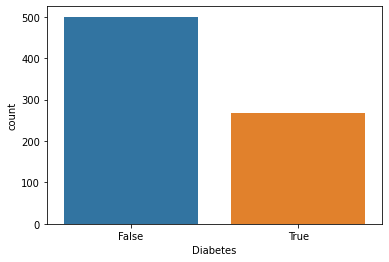

In [20]:
sns.countplot(df.Diabetes, label = 'Count')

## We inspect the Pregnancies variable

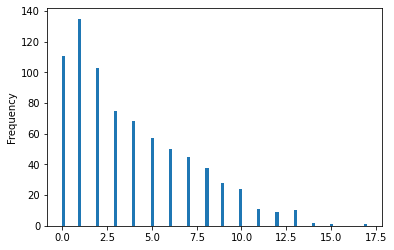

In [21]:
df.Pregnancies.plot(kind='hist', bins = 100)

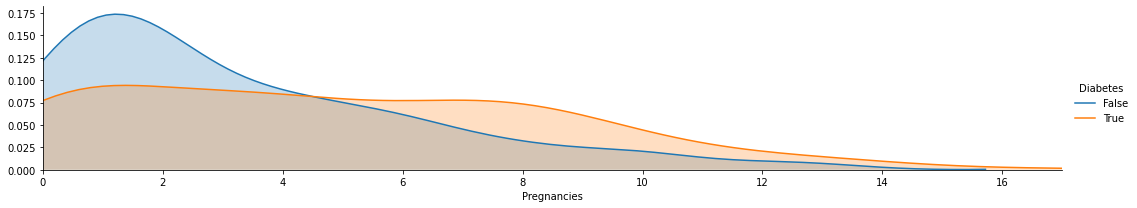

In [22]:
facet('Pregnancies')

## Next we inspect the Glucose variable 

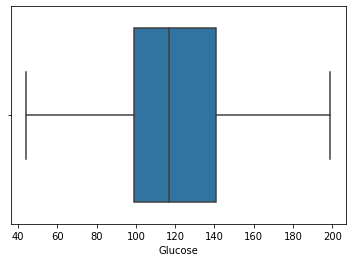

In [23]:
sns.boxplot(df.Glucose)

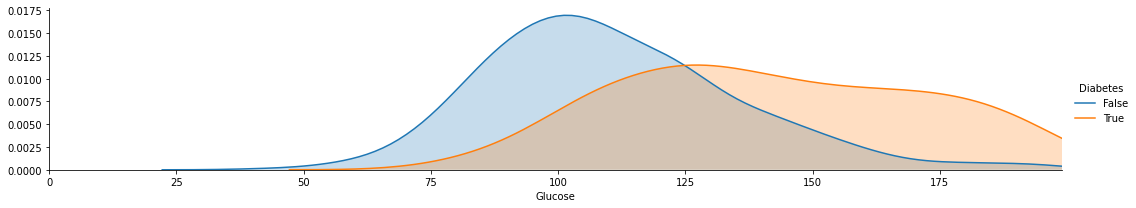

In [24]:
facet('Glucose')

In [25]:
df.Glucose.describe()

count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

In [26]:
sum(df.Pregnancies==0)

111

In [27]:
sum(df.Glucose==0)

0

In [28]:
sum(df.Skinfold==0)

0

In [29]:
sum(df.BMI==0)

0

In [30]:
df[df.BMI==0]

,Pregnancies,Glucose,Blood pressure,Skinfold,Insulin,BMI,Diabetes pedigree,Age,Diabetes


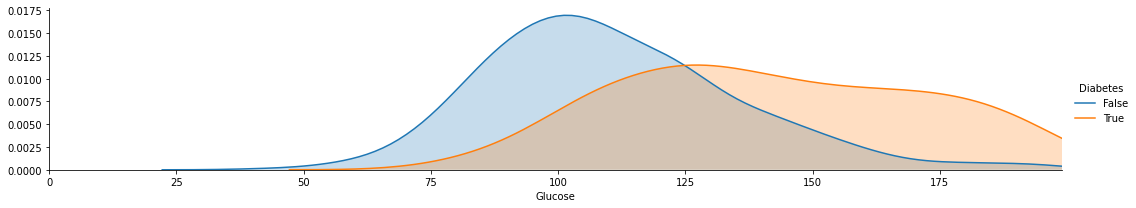

In [31]:
facet('Glucose')

### Glucose levels higher than 125, which is above average, are mostly related to a positive diabetes diagnosis.

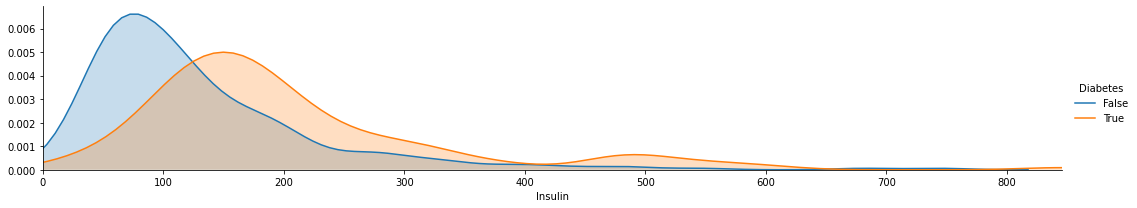

In [32]:
facet('Insulin')

# Feature Engineering 

In [32]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [33]:
imputer = SimpleImputer(strategy='mean')

In [34]:
scaler = StandardScaler()

In [35]:
pipeline = make_pipeline(imputer, scaler)

In [36]:
X = df.drop(['Diabetes'], axis=1)

In [37]:
X1 = pd.DataFrame(pipeline.fit_transform(X))

In [38]:
X1.columns = X.columns

In [39]:
y = df['Diabetes']

In [40]:
X1.head()

,Pregnancies,Glucose,Blood pressure,Skinfold,Insulin,BMI,Diabetes pedigree,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


# k-Fold validation

In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Splitting the data into train and test sets

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state=42)

# Modelling the data
## 1. kNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
training_accuracy = []
test_accuracy = []

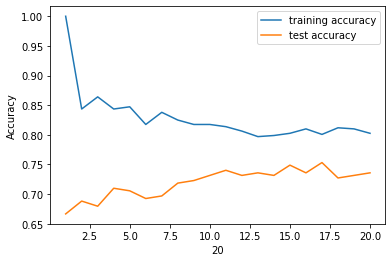

In [45]:
neighbors_settings = range(1,21)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel(n_neighbors)
plt.legend()
plt.savefig('knn_neighbors_comparison')

### We notice that at n_neighbors=17, we get the best performance 

In [46]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
print('The Accuracy of the kNN classifier on the training set is : {:.3f}'.format(knn.score(X_train, y_train)))
print('The Accuracy of the kNN classifier on the testing set is : {:.3f}'.format(knn.score(X_test, y_test)))

The Accuracy of the kNN classifier on the training set is : 0.801
The Accuracy of the kNN classifier on the testing set is : 0.753


# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
print('The training set accuracy score is: {:.3f}'.format(clf.score(X_train, y_train)))
print('The test set accuracy score is: {:.3f}'.format(clf.score(X_test, y_test)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The training set accuracy score is: 0.780
The test set accuracy score is: 0.740


In [48]:
clf001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print('The training set accuracy score is: {:.3f}'.format(clf.score(X_train, y_train)))
print('The test set accuracy score is: {:.3f}'.format(clf.score(X_test, y_test)))

The training set accuracy score is: 0.780
The test set accuracy score is: 0.740


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print('The training set accuracy score is: {:.3f}'.format(tree.score(X_train, y_train)))
print('The test set accuracy score is: {:.3f}'.format(tree.score(X_test, y_test)))

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


The training set accuracy score is: 1.000
The test set accuracy score is: 0.706


In [77]:
DecisionTreeClassifier??

In [50]:
tree = DecisionTreeClassifier(max_depth=5, random_state = 0)
tree.fit(X_train, y_train)
print('The training set accuracy score is: {:.3f}'.format(tree.score(X_train, y_train)))
print('The test set accuracy score is: {:.3f}'.format(tree.score(X_test, y_test)))

The training set accuracy score is: 0.827
The test set accuracy score is: 0.745


## Tuning the depth of the tree

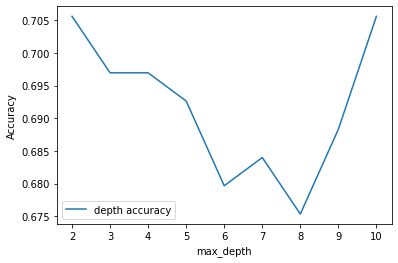

In [79]:
max_depth_range = list(range(2,11))
accuracy = []
for depth in max_depth_range:
    tree = DecisionTreeClassifier(min_samples_split= depth, random_state = 0)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    accuracy.append(score)
plt.plot(max_depth_range, accuracy, label='depth accuracy')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend()
plt.savefig('max_depth tuning')

#### max_depth = 5 gives the best performance

### Feature importance in the trees

In [52]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(tree.feature_importances_,3)})
importances = importances.set_index('feature')
print(importances)

                   importance
feature                      
Pregnancies             0.024
Glucose                 0.402
Blood pressure          0.051
Skinfold                0.036
Insulin                 0.068
BMI                     0.161
Diabetes pedigree       0.120
Age                     0.139


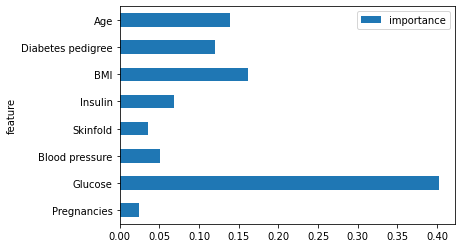

In [53]:
importances.plot(kind='barh')
plt.savefig('feature importance Tree')

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [55]:
rf = RandomForestClassifier(n_estimators = 100, random_state=0)
rf.fit(X_train, y_train)
print('The training accuracy is:{:.3f}'.format(rf.score(X_train, y_train)))
print('The testing accuracy is:{:.3f}'.format(rf.score(X_test, y_test)))

The training accuracy is:1.000
The testing accuracy is:0.745


In [56]:
rf5 = RandomForestClassifier(n_estimators = 500, random_state=0)
rf5.fit(X_train, y_train)
print('The training accuracy is:{:.3f}'.format(rf5.score(X_train, y_train)))
print('The testing accuracy is:{:.3f}'.format(rf5.score(X_test, y_test)))

The training accuracy is:1.000
The testing accuracy is:0.749


## Feature importance with Random Forests

In [57]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(rf.feature_importances_,3)})
importances = importances.set_index('feature')
print(importances)

                   importance
feature                      
Pregnancies             0.072
Glucose                 0.267
Blood pressure          0.082
Skinfold                0.074
Insulin                 0.082
BMI                     0.162
Diabetes pedigree       0.115
Age                     0.146


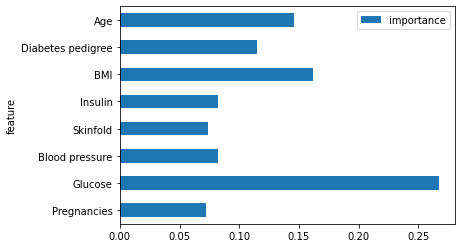

In [58]:
importances.plot(kind = 'barh')
plt.savefig('Feature importance RF')

## Gradfient Boosting 

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
print("The accuracy for the training set is:{:.3f}".format(gb.score(X_train, y_train)))
print("The accuracy for the testing set is:{:.3f}".format(gb.score(X_test, y_test)))

The accuracy for the training set is:0.942
The accuracy for the testing set is:0.740


### Hyperparameter tuning for Gradient Boosting
#### max_depth

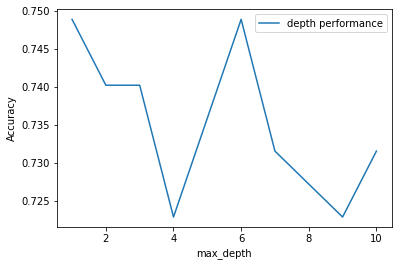

In [60]:
depth_list = list(range(1,11))
accuracy = []
for depth in depth_list:
    gb = GradientBoostingClassifier(max_depth=depth, random_state=0)
    gb.fit(X_train, y_train)
    score = gb.score(X_test, y_test)
    accuracy.append(score)
plt.plot(depth_list, accuracy, label='depth performance')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend()
plt.savefig('Max_depth tuning GB')

In [61]:
gb1 = GradientBoostingClassifier(max_depth=1, random_state=0)
gb1.fit(X_train, y_train)
print('The training set accuracy is:{:.3f}'.format(gb1.score(X_train, y_train)))
print('The testing set accuracy is:{:.3f}'.format(gb1.score(X_test, y_test)))

The training set accuracy is:0.804
The testing set accuracy is:0.749


#### The best performing max_depth are 1 and 6, to prevent overfitting, we use max_depth=1

In [62]:
gb001 = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gb001.fit(X_train, y_train)
print('The training set accuracy is:{:.3f}'.format(gb001.score(X_train, y_train)))
print('The testing set accuracy is:{:.3f}'.format(gb001.score(X_test, y_test)))

The training set accuracy is:0.799
The testing set accuracy is:0.753


### Feature importance for Gradient Boosting 

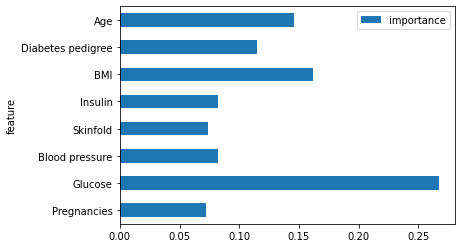

In [63]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(rf.feature_importances_,3)})
importances = importances.set_index('feature')
importances.plot(kind='barh')

## Support Vector Machine

In [64]:
from sklearn.svm import SVC
svc = SVC(C=1)
svc.fit(X_train, y_train)
print('The training set accuracy is:{:.3f}'.format(svc.score(X_train, y_train)))
print('The testing set accuracy is:{:.3f}'.format(svc.score(X_test, y_test)))

The training set accuracy is:0.838
The testing set accuracy is:0.740


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [70]:
y_pred = svc.predict(X_test)

In [71]:
print(confusion_matrix(y_test,y_pred))

[[121  30]
 [ 40  40]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

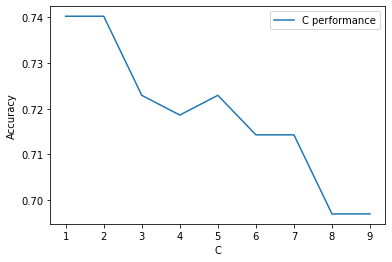

In [65]:
C_list = list(range(1,10))
accuracy = []
for c in C_list:
    svc = SVC(C=c)
    svc.fit(X_train, y_train)
    score = svc.score(X_test, y_test)
    accuracy.append(score)
plt.plot(C_list, accuracy, label='C performance')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend()
plt.savefig('C tuning SVM')

## Deep Learning 

In [76]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100, alpha=1, random_state=42)
mlp.fit(X_train, y_train)
print('The training set accuracy is:{:.3f}'.format(mlp.score(X_train, y_train)))
print('The testing set accuracy is:{:.3f}'.format(mlp.score(X_test, y_test)))

The training set accuracy is:0.799
The testing set accuracy is:0.732


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### kNN and GB gave us test_score=75.3%, they were the best performing models. 